# 1: Data transformation and exploratory data analysis

### (Exercise 3 from notebook "Exercises in DT and EDA")

Do an exploratory data analysis of the adult dataset. The cell below loads the dataset from UCI Machine Learning Repository into a pandas dataframe called `adult_data`. It requires that you have installed the package `ucimlrepo`. (Otherwise the dataset is on model for this class.)

---

### Assemble necessary libraries:

In [2]:
# Disable FutureWarnings while wokring for better readability
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Fetch adult dataset from online (UCIMLrepo)
from ucimlrepo import fetch_ucirepo
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets
X["income"] = y
adult_data = X.copy()

---

### **First look at the data**

Understanding the dataset features and their entries

In [5]:
adult_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Take aways from looking at the data head

"fnlwgt" feature:

- Unsure of what the feature "fnlwgt" describes, perhaps a discriminater feature from the survey.
- Conclude that "fnlwgt" dosen't seem to have a connection to the remaining features. Therefore is not relevant to include in analysis.

"education" vs "education-num":
- The "education-num" feature is a numeric representation of the "education" feature.
- Conclude that it results in redundancy including both features in the analysis.

In [6]:
# Dropping features that are not needed for analysis
# Drop "fnlwgt"
adult_data.drop(columns=['fnlwgt'], inplace=True)
# Drop "education-num"
adult_data.drop(columns=['education-num'], inplace=True)
# Confirm that it worked as intended
adult_data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### **Handling missing values**

Look for missing values in the data, understand the situation and act accordingly.

In [7]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      47876 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48568 non-null  object
 12  income          48842 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


### Take aways from looking at the data info

"workclass" 963 missing, "occupation" 966 missing and "native-country" 274 missing.

- Impactful amount of mising values.
- These three features are useful for income prediction.
- Dropping rows with NA's would reduce dataset size.
- Since they are categorical values, we can fill NA's with a "Unknown" category, and still use the remain data in the rows for analysis.

In [8]:
# Fill missing values with "Unknown" string/category
# workclass:
adult_data['workclass'].fillna('Unknown', inplace=True)
# occupation:
adult_data['occupation'].fillna('Unknown', inplace=True)
# native-country:
adult_data['native-country'].fillna('Unknown', inplace=True)
# Confirm that it works as intended
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
 12  income          48842 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


### **Encoding of the "income" feature**

The "income" feature seems to be encoded wrong. The categorical value "income" is supposed to do sort people into one of two categories: "<=50k" or ">50k" income.
We inspect it using value_counts() on the "income" feature.

In [9]:
adult_data['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

### Take aways of value_counts() inspection

- Redundancy, inproper encoding introducing 4 categories instead of 2.
- "<=50k" and "<=50k."
- ">50k" and ">50k."
- Decribing the same category, we merge the pairs, removing the dot.
- This will prep the feature for better analysis.

In [10]:
# Map the encoding into proper one, merging the the categories with shared meaning
adult_data['income'] = adult_data['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
# Ensure it worked as intended
adult_data['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

---

### **EDA: Educations & Workclass impact on Income**

Lets say we wanted to make a income prediction or analysis, then it is importan to explore features that higly discriminate wether peopler are making more or less that 50K.

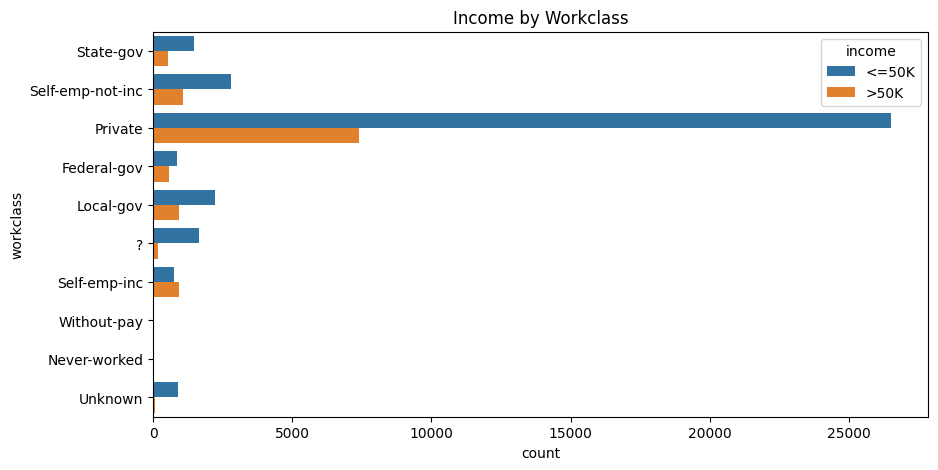

In [11]:
# Attempting to visualize correlation between workclass and income category with a count plot
plt.figure(figsize=(10,5))
sns.countplot(y='workclass', hue='income', data=adult_data)
plt.title("Income by Workclass")
plt.show()

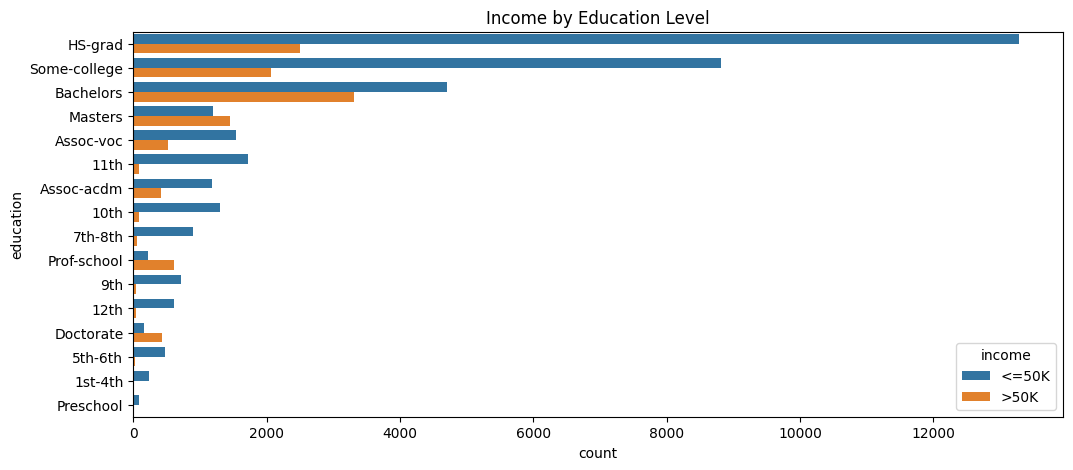

In [12]:
# Attempting to visualize correlation between education and income category with a count plot
plt.figure(figsize=(12,5))
# Sort by value_counts with the highest amount of records
sns.countplot(y='education', hue='income', data=adult_data, order=adult_data['education'].value_counts().index)
plt.title("Income by Education Level")
plt.show()

### Take aways from Workclass & Educations plotting

- Workclasses have varrying low vs high income ratios.
- This means some Workclasses make more/less than others on average.
- Higher education generally seems to mean higher income.

---